# CubePlusPlus Pipeline Profiling Analysis with Compression

### Prerequisites

None. Exemplary logs are loaded by default. Experiments were run on:

* Storage: CEPH HDD
* CPU: Intel Xeon E5-2630 v3 8x@2.4GHz
* Image: ubuntu-18.04-lts/Openstack
* Memory: 80GB DDR4


In [1]:
full_dataset_samplecount = 4890
for sample_size in [500, 1000, 2000, 4000]:
    print(f"{sample_size} of total: {round(sample_size / full_dataset_samplecount * 100, 2)}%")

500 of total: 10.22%
1000 of total: 20.45%
2000 of total: 40.9%
4000 of total: 81.8%


In [2]:
%load_ext autoreload
%autoreload 2
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import ticker
from typing import List
# adding previous directory for easier use of library
import sys
sys.path.append('../')
from notebookhelper import show_values_on_bars, show_values_on_catplot, save_figure, make_big_number_prettier

from presto.analysis import StrategyAnalysis \
                       , strat_analysis_from_csv

pd.set_option('display.max_rows', 200)
plotting_context = "paper"
default_palette = "colorblind"
epoch_palette = sns.color_palette("YlOrRd", 3)
samples_palette = sns.color_palette("icefire", 15)
threads_palette = sns.color_palette("tab20", 4)
compression_palette = sns.color_palette("Spectral",3)
font_scale = 1.4
sns.set(font_scale=font_scale, context=plotting_context)
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})

In [3]:
local_fig_dir = "cubeplusplus-jpg-pipeline"

def save_fig(name, file_type='pdf'):
    save_figure(name, local_fig_dir=local_fig_dir, file_type=file_type)

home_path = "../logs/final-logs/cubeplusplus/jpg/compression"
path_to_cum_df = f"{home_path}/cubeplusplus-jpg-compression-GZIP-none-ZLIB-storage-ceph-hdd_2021-09-29-22:05:46_cum-df_samples-4890_threads-8.csv"
path_to_cum_dstat_df = f"{home_path}/cubeplusplus-jpg-compression-GZIP-none-ZLIB-storage-ceph-hdd_2021-09-29-22:05:46_cum-dstat-df_samples-4890_threads-8.csv"
sampling_tag = ""

analysis = strat_analysis_from_csv(path_to_cum_dstat_df = path_to_cum_dstat_df
                                   , path_to_cum_df = path_to_cum_df)
cum_dstat_df = analysis.to_cum_dstat_df()
cum_df       = analysis.to_cum_df()
# need to sort the strategies for some reason as they are not ascending
cum_df = cum_df.sort_values(by='split_name')
strategies   = list(cum_df.split_name.unique())
strategies_renamed = ["concatenated", "decoded", "resized", "pixel-\ncentered"]
print(strategies)

['2-read-image', '3-decode-image', '4-resize-image', '5-center-pixel-values']


In [4]:
cum_df

,offline_processing_and_save_time_s,shard_count,thread_count,shard_cum_size_MB,sample_count,online_processing_time_s,throughput_sps,runs_count,runs_total,ueid,split_name,creation_timestamp,compression_type,storage_type
0,107.043953,8,8,2585.600098,4890,19.273350,253.718231,0,1,7efab8,2-read-image,2021-09-29-22:05:46,GZIP,ceph-hdd
20,44.720570,8,8,2604.490723,4890,18.023464,271.312988,0,1,188186,2-read-image,2021-09-29-21:04:36,none,ceph-hdd
28,39.624687,8,8,2604.490723,4890,17.152142,285.095612,0,1,d60cc6,2-read-image,2021-09-30-00:52:25,none,ceph-hdd
32,44.134819,8,8,2604.490723,4890,18.021645,271.340393,0,1,0e02d3,2-read-image,2021-09-30-02:46:49,none,ceph-hdd
16,106.322151,8,8,2585.593750,4890,18.381580,266.027191,0,1,2a5dee,2-read-image,2021-09-30-05:41:42,GZIP,ceph-hdd
36,42.525017,8,8,2604.490723,4890,17.666824,276.790009,0,1,ecef73,2-read-image,2021-09-30-04:41:02,none,ceph-hdd
40,103.092911,8,8,2585.598389,4890,17.418791,280.731323,0,1,3ed43c,2-read-image,2021-09-29-21:14:05,ZLIB,ceph-hdd
12,105.885727,8,8,2585.590820,4890,18.258999,267.813171,0,1,1156d4,2-read-image,2021-09-30-03:48:24,GZIP,ceph-hdd
44,105.687561,8,8,2585.590820,4890,18.037067,271.108368,0,1,a7c697,2-read-image,2021-09-29-23:07:44,ZLIB,ceph-hdd
24,44.277626,8,8,2604.490723,4890,17.688606,276.449127,0,1,20a9a0,2-read-image,2021-09-29-22:58:09,none,ceph-hdd


In [5]:
cum_dstat_df.head(5)

,rel_time_s,disk_read_mbs,disk_write_mbs,net_read_mbs,net_write_mbs,run,sample_count,shard_count,thread_count,ueid,...,vm_allocated_mb,vm_free_mb,filesystem_files,filesystem_inodes,filelocks_posix,filelocks_lock,filelocks_read,filelocks_write,compression_type,storage_type
0,0.0,0.034390,0.275578,0.000000,0.000000,0,4890,8,8,7efab8,...,0.01,0.01,1312.0,13955.0,3.0,2.0,0.0,5.0,GZIP,ceph-hdd
1,1.0,9.576448,0.000000,21.742149,0.114196,0,4890,8,8,7efab8,...,0.03,0.01,1344.0,14017.0,3.0,2.0,0.0,5.0,GZIP,ceph-hdd
2,2.0,0.000000,0.000000,26.781490,0.127653,0,4890,8,8,7efab8,...,0.02,0.01,1344.0,14066.0,3.0,2.0,0.0,5.0,GZIP,ceph-hdd
3,3.0,0.000000,0.000000,24.204819,0.111549,0,4890,8,8,7efab8,...,0.03,0.02,1344.0,14109.0,3.0,2.0,0.0,5.0,GZIP,ceph-hdd
4,4.0,0.000000,0.069632,24.825373,0.100478,0,4890,8,8,7efab8,...,0.02,0.01,1344.0,14154.0,3.0,2.0,0.0,5.0,GZIP,ceph-hdd


## 0. Experiment Information

### 0.1 Experiment Count

We want to profile each strategy with each compression at least 5 times. 

In [6]:
experiment_count_dict = {
    "split_name": []
  , "compression_type": []
  , "count": []
}

def get_experiment_count(df):
    '''Short helper'''
    return len(df.index)

def add_to_dict(split_name, compression_type, count):
    '''Short helper'''
    experiment_count_dict["split_name"] += [split_name]
    experiment_count_dict["compression_type"] += [compression_type]
    experiment_count_dict["count"] += [count]

for split_name in cum_df["split_name"].unique():
    for compression in cum_df["compression_type"].unique():
        experiment_count = get_experiment_count(cum_df.query(f"split_name=='{split_name}' and compression_type=='{compression}'"))
        add_to_dict(split_name, compression, experiment_count)
        
experiment_count_df = pd.DataFrame.from_dict(experiment_count_dict)
experiment_count_df

,split_name,compression_type,count
0,2-read-image,GZIP,5
1,2-read-image,none,5
2,2-read-image,ZLIB,5
3,3-decode-image,GZIP,5
4,3-decode-image,none,5
5,3-decode-image,ZLIB,5
6,4-resize-image,GZIP,5
7,4-resize-image,none,5
8,4-resize-image,ZLIB,5
9,5-center-pixel-values,GZIP,5


In [7]:
# order should be "none" -> "GZIP" -> "ZLIB"

cum_df_ord = cum_df.copy(deep=True)
order_dict = { "none": 10, "GZIP": 11, "ZLIB": 12 }
cum_df_ord = cum_df_ord.sort_values(by=['compression_type', 'split_name'], key=lambda x: x.map(order_dict))
cum_df_ord

,offline_processing_and_save_time_s,shard_count,thread_count,shard_cum_size_MB,sample_count,online_processing_time_s,throughput_sps,runs_count,runs_total,ueid,split_name,creation_timestamp,compression_type,storage_type
20,44.720570,8,8,2604.490723,4890,18.023464,271.312988,0,1,188186,2-read-image,2021-09-29-21:04:36,none,ceph-hdd
28,39.624687,8,8,2604.490723,4890,17.152142,285.095612,0,1,d60cc6,2-read-image,2021-09-30-00:52:25,none,ceph-hdd
32,44.134819,8,8,2604.490723,4890,18.021645,271.340393,0,1,0e02d3,2-read-image,2021-09-30-02:46:49,none,ceph-hdd
36,42.525017,8,8,2604.490723,4890,17.666824,276.790009,0,1,ecef73,2-read-image,2021-09-30-04:41:02,none,ceph-hdd
24,44.277626,8,8,2604.490723,4890,17.688606,276.449127,0,1,20a9a0,2-read-image,2021-09-29-22:58:09,none,ceph-hdd
25,258.034576,8,8,65706.921875,4890,68.331459,71.562943,0,1,40ae4c,3-decode-image,2021-09-29-22:58:09,none,ceph-hdd
37,264.002197,8,8,65706.921875,4890,68.588860,71.294380,0,1,80ef9f,3-decode-image,2021-09-30-04:41:02,none,ceph-hdd
33,257.248474,8,8,65706.921875,4890,67.986351,71.926201,0,1,853789,3-decode-image,2021-09-30-02:46:49,none,ceph-hdd
29,264.093781,8,8,65706.921875,4890,71.541428,68.352005,0,1,150861,3-decode-image,2021-09-30-00:52:25,none,ceph-hdd
21,271.427826,8,8,65706.921875,4890,68.140991,71.762970,0,1,a01c94,3-decode-image,2021-09-29-21:04:36,none,ceph-hdd


# 3. Compression
## 3.1 Compression Rate for each strategy

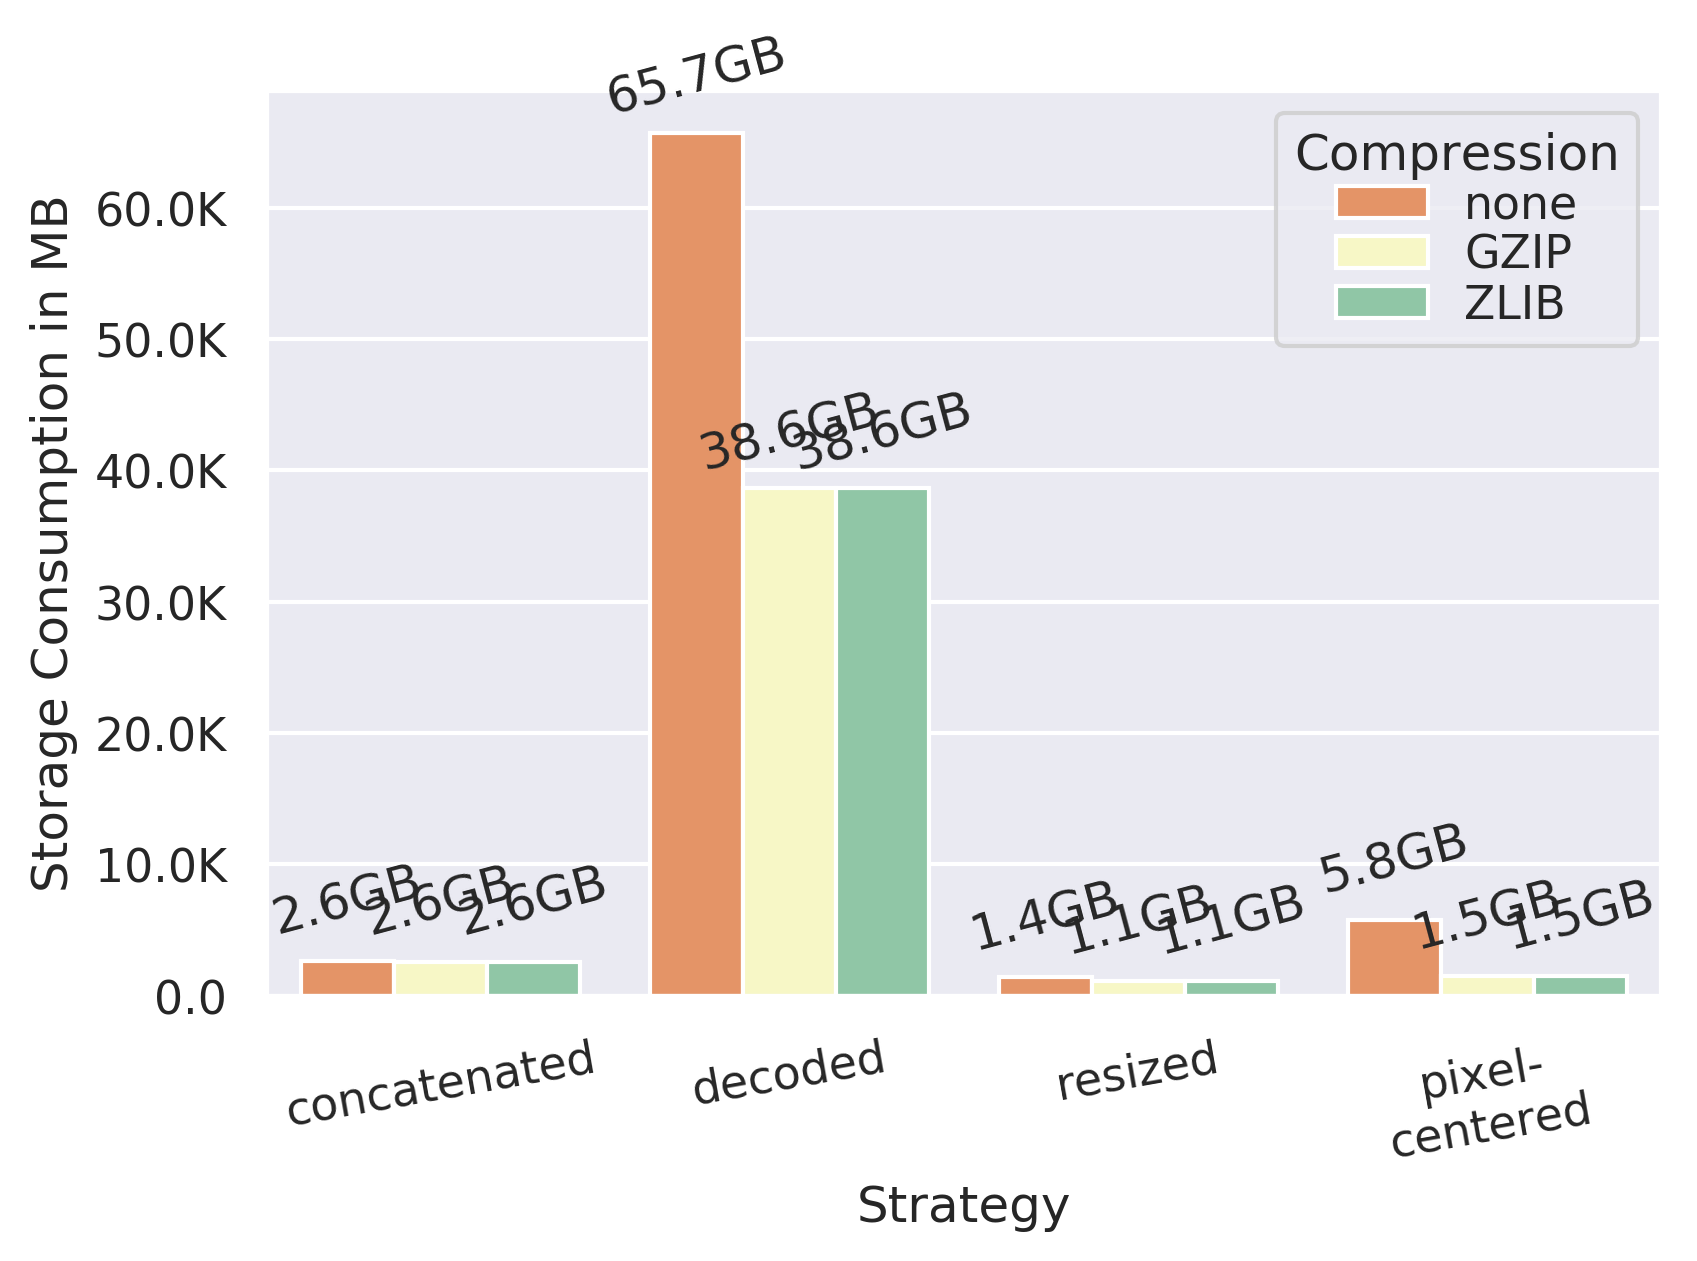

In [8]:
sns.set(palette=compression_palette)
from notebookhelper import show_values_on_bars, show_values_on_catplot, save_figure, make_big_number_prettier


cum_df_temp = cum_df_ord

plot = sns.barplot(
    x="split_name",
    y="shard_cum_size_MB",
    hue="compression_type",
    data=cum_df_temp
)
plot.set_xticklabels(
    strategies_renamed
  , rotation=10
)
#plot.set(ylim=(0, 1650000))
plot.set(xlabel="Strategy", ylabel="Storage Consumption in MB")
plot.legend(title="Compression", ncol=1, labelspacing=0.1)
plot.yaxis.set_major_formatter(make_big_number_prettier)
show_values_on_bars(plot, h_v="v", space=5000, rotation=15, storage_formatting=True, storage_round=1)
#                    , additional_space=[50000,-50000,0,-50000
#                                       ,0,0,0,0
#                                       ,-50000,-50000,-50000,-50000])

#save_fig("compressed-storage-consumption")

## 3.2 Storage and Throughput for each strategy

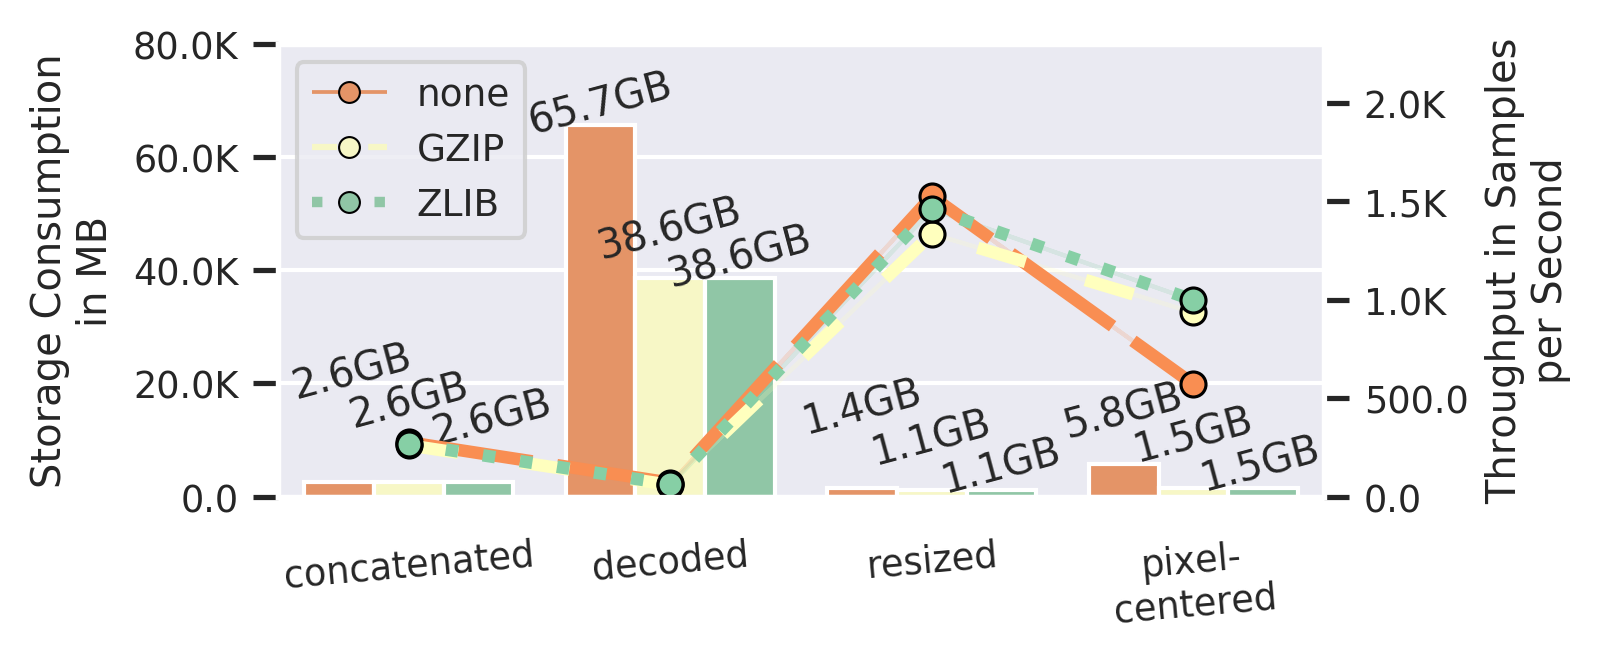

In [13]:
from matplotlib.lines import Line2D

sns.set(palette=compression_palette,font_scale=0.8)
marker = 'o'
linestyle = [(10,2), (4,5), (1,2)]
linestyle2 = [(0,(10,2)), (0,(4,5)), (0,(1,2))]

fig, ax1 = plt.subplots(figsize=(4.5,2))
ax2 = ax1.twinx()

## throughput plot
plot2 = sns.lineplot(
    x="split_name",
    y="throughput_sps",
    hue="compression_type",
    data=cum_df_temp,
    ax=ax2,
    size=3,
    sizes=(3,3),
    marker=marker,
    dashes=linestyle,
    ci=0.95,
    markeredgecolor='black',
    style='compression_type')

plot2.set(ylabel="Throughput in Samples\nper Second")
ax2.grid(False)
legend_elements = [
    Line2D([0], [0], marker=marker, markeredgecolor='#000000', markeredgewidth=0.5, markersize=5, lw=0.9, label='none', color="#E49467", linestyle=linestyle2[0]),
    Line2D([0], [0], marker=marker, markeredgecolor='#000000', markeredgewidth=0.5, markersize=5, lw=1.5, label='GZIP', color="#F7F7C6", linestyle=linestyle2[1]),
    Line2D([0], [0], marker=marker, markeredgecolor='#000000', markeredgewidth=0.5, markersize=5, lw=2.5, label='ZLIB', color="#90C6A6", linestyle=linestyle2[2])]
ax2.legend(handles=legend_elements, loc="upper left", prop={'size': 9})
plot2.set(ylim=(0, 2300))          

plot = sns.barplot(
        x="split_name",
        y="shard_cum_size_MB",
        hue="compression_type",
        data=cum_df_temp,
        ax=ax1
    )
plot.set_xticklabels(
    strategies_renamed
  , rotation=5
)
plot.set(ylabel="Storage Consumption\nin MB", xlabel="")
plot.yaxis.set_major_formatter(make_big_number_prettier)
show_values_on_bars(plot, h_v="v", space=5000, rotation=15, storage_formatting=True, storage_round=1,
                    additional_space=[15000,0,10000,5000
                                     ,10000,5000,5000,5000
                                     ,7000,0,0,0] \
                   ,additional_x_space=[0.05,0,0,0
                                       ,0,0,0,0
                                       ,0.05,0,0,-0.01])

plot.set(ylim=(0, 80000))
ax1.get_legend().remove()
plot.yaxis.set_major_formatter(make_big_number_prettier)
plot2.yaxis.set_major_formatter(make_big_number_prettier)
save_fig("compressed-storage-vs-throughput")

## 3.3 Throughput for each compression and each strategy

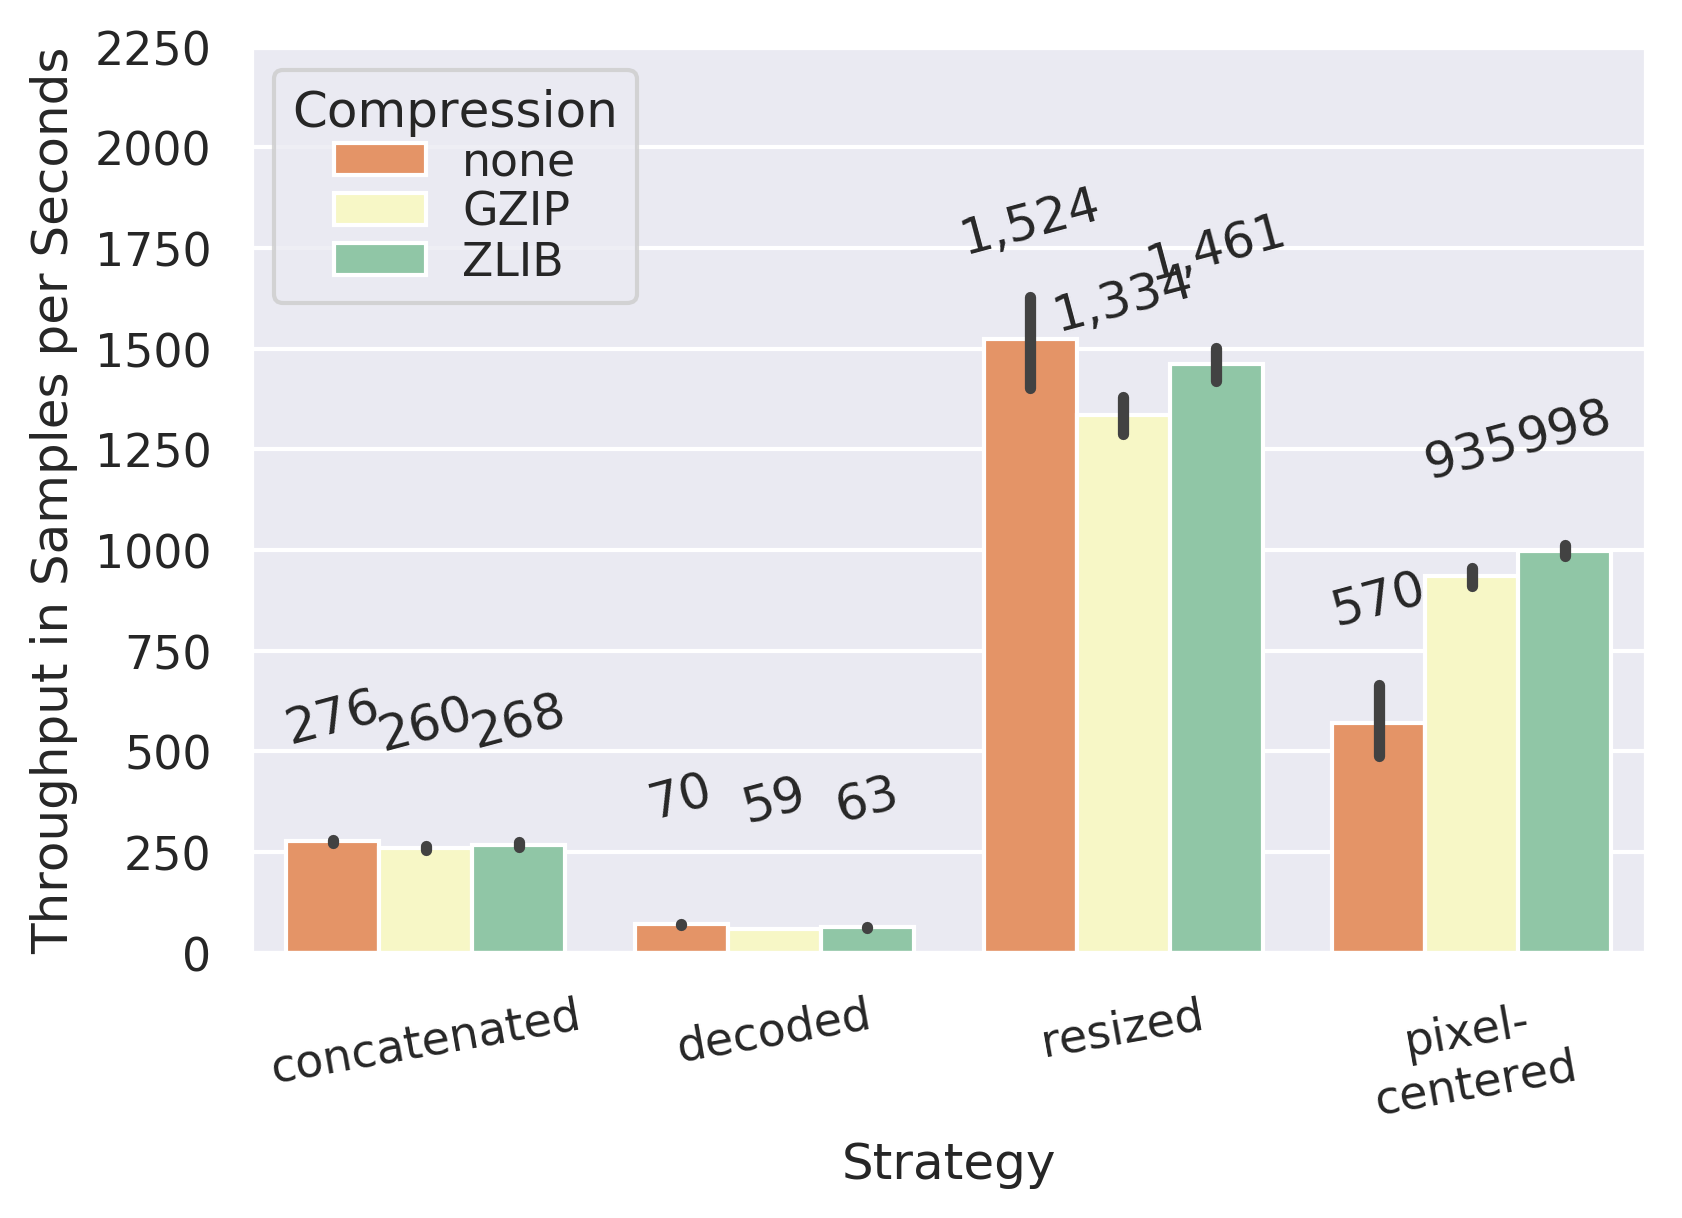

In [10]:
sns.set(palette=compression_palette)

cum_df_temp = cum_df_ord

plot = sns.barplot(
    x="split_name",
    y="throughput_sps",
    hue="compression_type",
    data=cum_df_temp
)
plot.set_xticklabels(
    strategies_renamed
  , rotation=10
)
plot.set(xlabel="Strategy", ylabel="Throughput in Samples per Seconds")
plot.set(ylim=(0, 2250))
plot.legend(title="", ncol=1, labelspacing=0.1, loc="upper left")
show_values_on_bars(plot, h_v="v", space=300, rotation=15)

#save_fig("compression-throughput")

## 3.3 Full Dataset Processing Split

### Normalizing the processing time per samples and renaming the maximum sample count to "full"

In [11]:
# calculate the per sample processing time for both offline and online processing
cum_df_ord["per_sample_online_processing_time_s"] = cum_df_ord["online_processing_time_s"] / cum_df_ord["sample_count"]
cum_df_ord["per_sample_offline_processing_and_save_time_s"] = cum_df_ord["offline_processing_and_save_time_s"] / cum_df_ord["sample_count"]
# calculate the total processing time for each sample count
cum_df_ord["total_processing_time_s"] = cum_df_ord["online_processing_time_s"] + cum_df_ord["offline_processing_and_save_time_s"]
# extrapolate based on the full count of images
cum_df_ord["full_dataset_online_processing_time_s"] = cum_df_ord["per_sample_online_processing_time_s"] * full_dataset_samplecount
cum_df_ord["full_dataset_offline_processing_and_save_time_s"] = cum_df_ord["per_sample_offline_processing_and_save_time_s"] * full_dataset_samplecount
cum_df_ord["full_dataset_offline_processing_and_save_time_m"] = cum_df_ord["full_dataset_offline_processing_and_save_time_s"] / 60
cum_df_ord["full_dataset_offline_processing_and_save_time_h"] = cum_df_ord["full_dataset_offline_processing_and_save_time_m"] / 60

# sum the offline and online time for the full dataset processing time (converted to hours)
cum_df_ord["full_dataset_processing_time_s"] = cum_df_ord["full_dataset_online_processing_time_s"] + cum_df_ord["full_dataset_offline_processing_and_save_time_s"]
cum_df_ord["full_dataset_processing_time_m"] = cum_df_ord["full_dataset_processing_time_s"] / 60
cum_df_ord["full_dataset_processing_time_h"] = cum_df_ord["full_dataset_processing_time_m"] / 60 

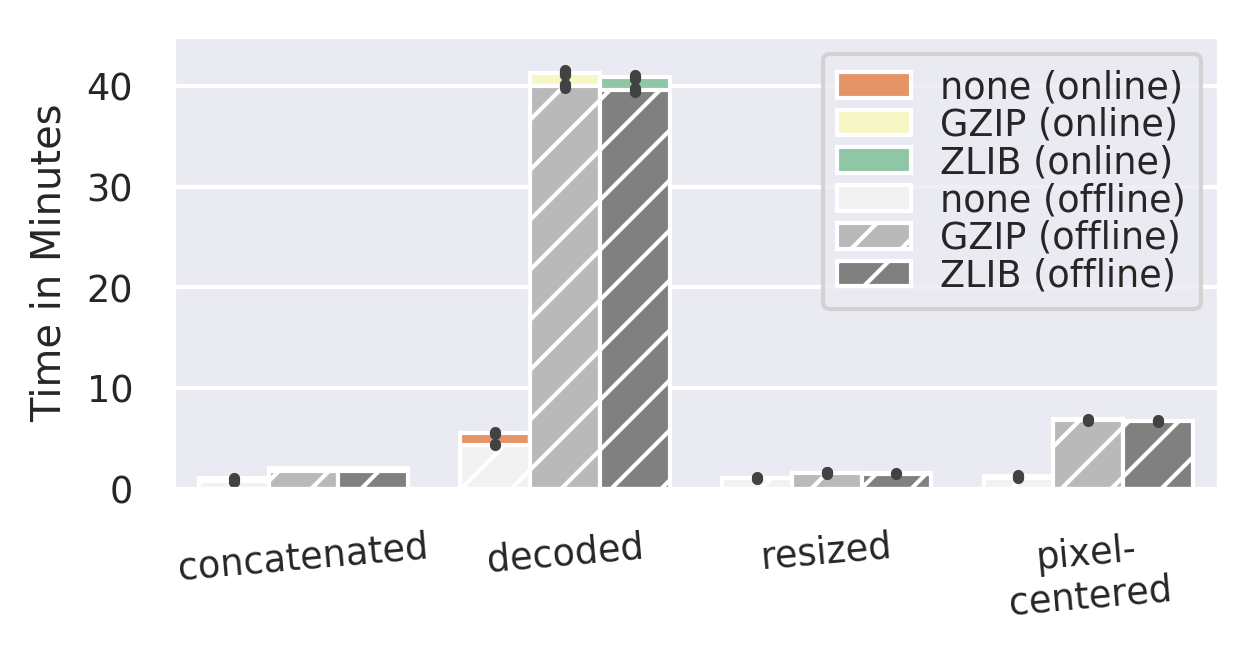

In [12]:
cum_df_temp = cum_df_ord
sns.set(palette=compression_palette, font_scale=0.8)
fig, ax1 = plt.subplots(figsize=(4.5,2))
plot = sns.barplot(
    x="split_name",
    y="full_dataset_processing_time_m",
    hue="compression_type",
    data=cum_df_temp
)
plot = sns.barplot(
    x="split_name",
    y="full_dataset_offline_processing_and_save_time_m",
    hue="compression_type",
    data=cum_df_temp,
    color="grey"
)

plot.set_xticklabels(
    strategies_renamed
  , rotation=5
)

sample_counts = len(cum_df_temp.compression_type.unique())
strategies_count = len(cum_df_temp.split_name.unique())

for i,bar in enumerate(plot.patches):
    if i > (sample_counts * strategies_count):
        bar.set_hatch("//")

plot.set(xlabel="", ylabel="Time in Minutes")
plot.set(ylim=(0, 45))

handles, labels = plot.get_legend_handles_labels()

def add_status_to_handle(handle, index):
    compression_count = 3
    label = handle.get_label()
    if index >= compression_count:
        new_label = label + ' (offline)'
    else:
        new_label = label + ' (online)'
    handle.set_label(new_label)
    
for i, handle in enumerate(handles):
    add_status_to_handle(handle,index=i)

plot.legend(handles=handles, title="", loc="upper right", ncol=1, labelspacing=0.02, columnspacing=0.3)
save_fig("compression-processing-time-split")

# X. Misc Plots and Calculations

## X.1 -

In [8]:
space_dict = {
    "strategy": []
   ,"space_saving_gzip": []
   ,"space_saving_zlib": []
   ,"sps_increase_gzip_fac": []
   ,"sps_increase_zlib_fac": []
   ,"offline_time_factor": []
}

def add_to_dict(strategy, ss_gzip, ss_zlib, sps_gzip, sps_zlib, offline_time_factor):
    space_dict["strategy"].append(strategy)
    space_dict["space_saving_gzip"].append(ss_gzip)
    space_dict["space_saving_zlib"].append(ss_zlib)
    space_dict["sps_increase_gzip_fac"].append(sps_gzip)
    space_dict["sps_increase_zlib_fac"].append(sps_zlib)
    space_dict["offline_time_factor"].append(offline_time_factor)
    
    
def space_saving(compressed, original):
    return round((1 - (compressed / original)) * 100, 2)

def throughput_increase(compressed, original):
    return round(compressed / original, 2)
    
for split_name in cum_df.split_name.unique():
    
    temp_df = cum_df.query(f"split_name=='{split_name}'")
    original_size = temp_df.query("compression_type=='none'").mean()["shard_cum_size_MB"]
    original_sps = temp_df.query("compression_type=='none'").mean()["throughput_sps"]
    original_offline = temp_df.query("compression_type=='none'").mean()["offline_processing_and_save_time_s"]

    gzip_size = temp_df.query("compression_type=='GZIP'").mean()["shard_cum_size_MB"]
    gzip_sps = temp_df.query("compression_type=='GZIP'").mean()["throughput_sps"]
    gzip_offline = temp_df.query("compression_type=='GZIP'").mean()["offline_processing_and_save_time_s"]
    
    zlib_size = temp_df.query("compression_type=='ZLIB'").mean()["shard_cum_size_MB"]
    zlib_sps = temp_df.query("compression_type=='ZLIB'").mean()["throughput_sps"]

    print(f"Strategy: {split_name}")
    print(f"- Orig: {round(original_size, 2)}MB")
    print(f"- Orig: {round(original_sps, 2)}sps")
    print(f"- GZIP: {round(gzip_size, 2)}MB")
    print(f"- GZIP: {round(gzip_sps, 2)}sps")
    print(f"- ZLIB: {round(zlib_size, 2)}MB")    
    print(f"- ZLIB: {round(zlib_sps, 2)}sps")
    add_to_dict(strategy = split_name
               ,ss_gzip = space_saving(compressed = gzip_size, original = original_size)
               ,ss_zlib = space_saving(compressed = zlib_size, original = original_size)
               ,sps_gzip = throughput_increase(compressed = gzip_sps, original = original_sps)
               ,sps_zlib = throughput_increase(compressed = zlib_sps, original = original_sps)
               ,offline_time_factor = round((gzip_offline / original_offline), 2) )
    
pd.DataFrame(space_dict)    

Strategy: 2-read-image
- Orig: 2604.49MB
- Orig: 276.2sps
- GZIP: 2585.59MB
- GZIP: 260.7sps
- ZLIB: 2585.6MB
- ZLIB: 268.08sps
Strategy: 3-decode-image
- Orig: 65706.92MB
- Orig: 70.98sps
- GZIP: 38622.91MB
- GZIP: 59.22sps
- ZLIB: 38622.9MB
- ZLIB: 63.3sps
Strategy: 4-resize-image
- Orig: 1442.43MB
- Orig: 1524.52sps
- GZIP: 1089.35MB
- GZIP: 1334.06sps
- ZLIB: 1089.4MB
- ZLIB: 1461.16sps
Strategy: 5-center-pixel-values
- Orig: 5768.79MB
- Orig: 570.57sps
- GZIP: 1516.48MB
- GZIP: 935.58sps
- ZLIB: 1516.45MB
- ZLIB: 998.05sps


,strategy,space_saving_gzip,space_saving_zlib,sps_increase_gzip_fac,sps_increase_zlib_fac,offline_time_factor
0,2-read-image,0.73,0.73,0.94,0.97,2.45
1,3-decode-image,41.22,41.22,0.83,0.89,9.12
2,4-resize-image,24.48,24.48,0.88,0.96,1.49
3,5-center-pixel-values,73.71,73.71,1.64,1.75,6.15


## X.2 Warning - Creating the plots based on `dstat` logs can take several hours

In [104]:
cum_dstat_df_copy = cum_dstat_df.copy(deep=True)
cum_dstat_df_copy["sample_count"] = cum_dstat_df_copy.sample_count.astype('category')
cum_dstat_df_copy["split_name"] = cum_dstat_df_copy.split_name.astype('category')
cum_dstat_df_copy["run"] = cum_dstat_df_copy.run.astype('category')
cum_dstat_df_copy["thread_count"] = cum_dstat_df_copy.thread_count.astype('category')
strategy_list = list(cum_dstat_df_copy.split_name.unique())
strategy_list

['2-read-image', '3-decode-image', '4-resize-image', '5-center-pixel-values']

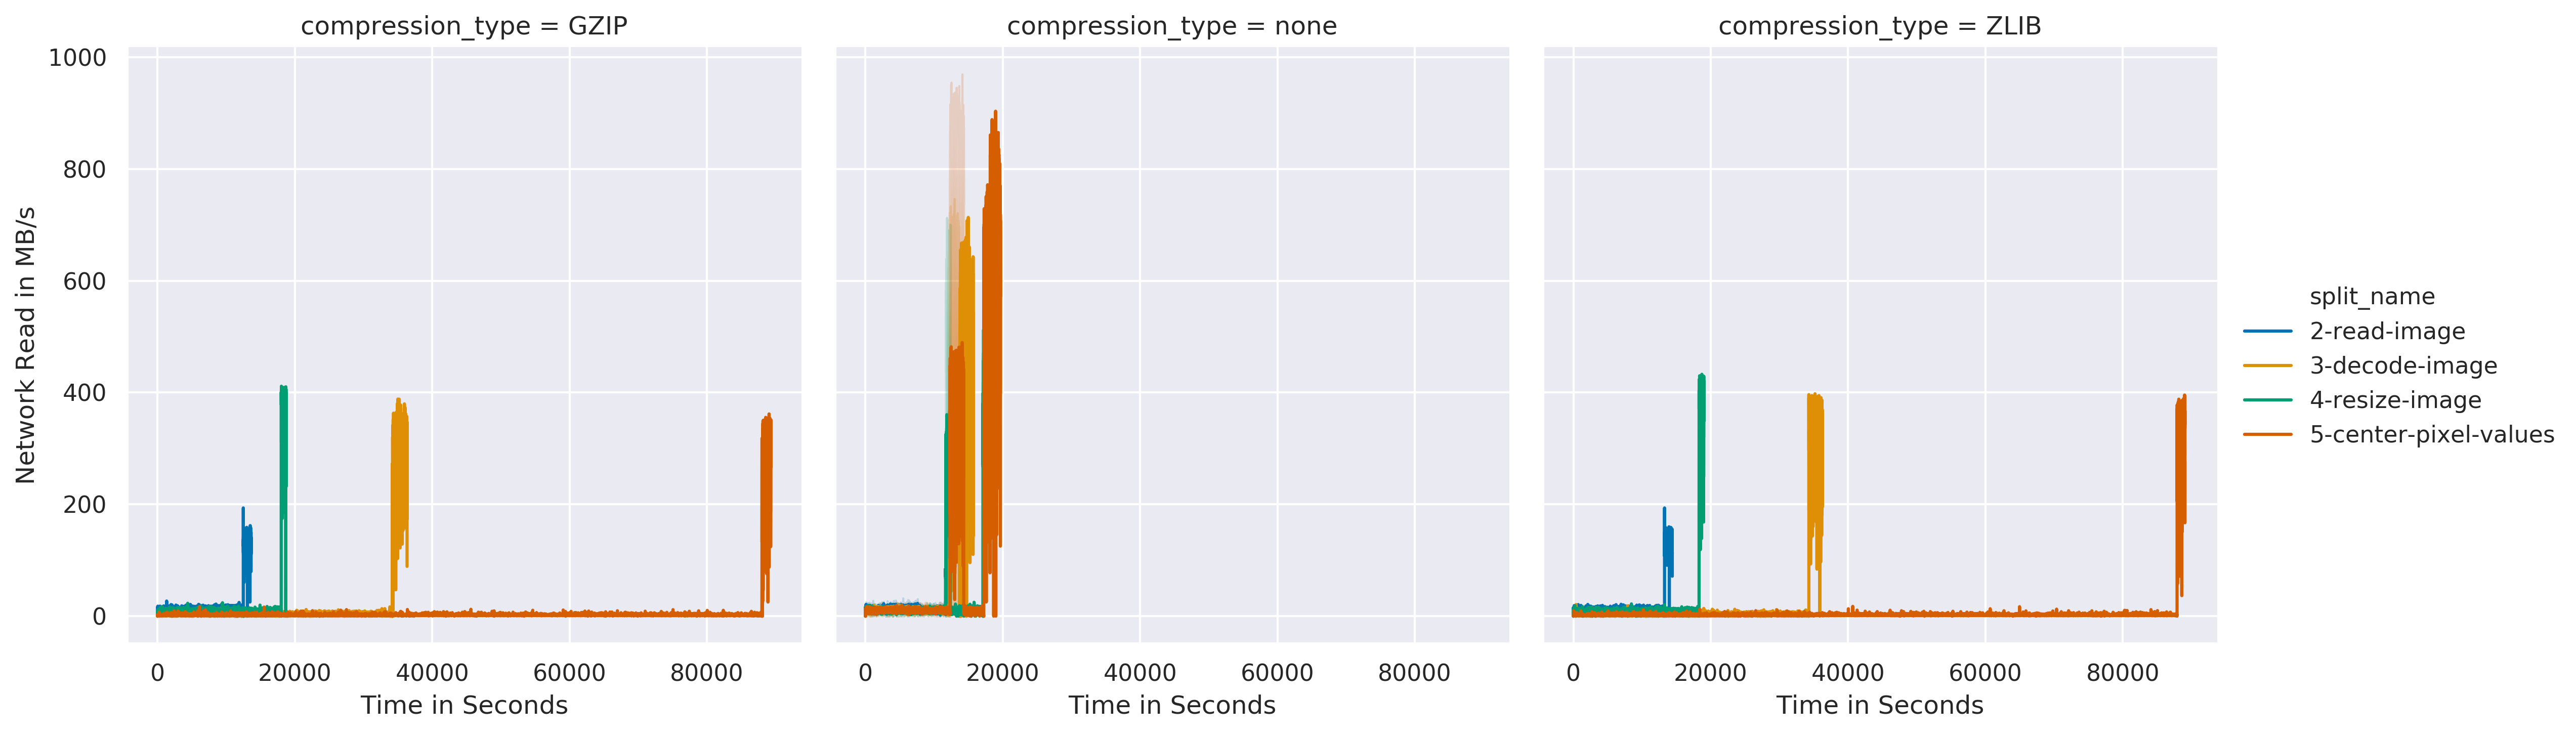

In [105]:
sns.set(palette=default_palette)

cum_dstat_df_temp = cum_dstat_df_copy

plot = sns.relplot(
    x="rel_time_s",
    y="net_read_mbs",
    hue="split_name",
    col="compression_type",
    kind="line",
    data=cum_dstat_df_temp,
    ci=95
)
plot.set(xlabel="Time in Seconds", ylabel="Network Read in MB/s")
#plot.set(ylim=(0, 1200))
#plot.axhline(1100, color="black")
#plot.legend(strategies_renamed, title="Strategy", loc="upper right", ncol=1,labelspacing=0.10)
#save_fig("network-read-speed-t8-full", file_type="png")

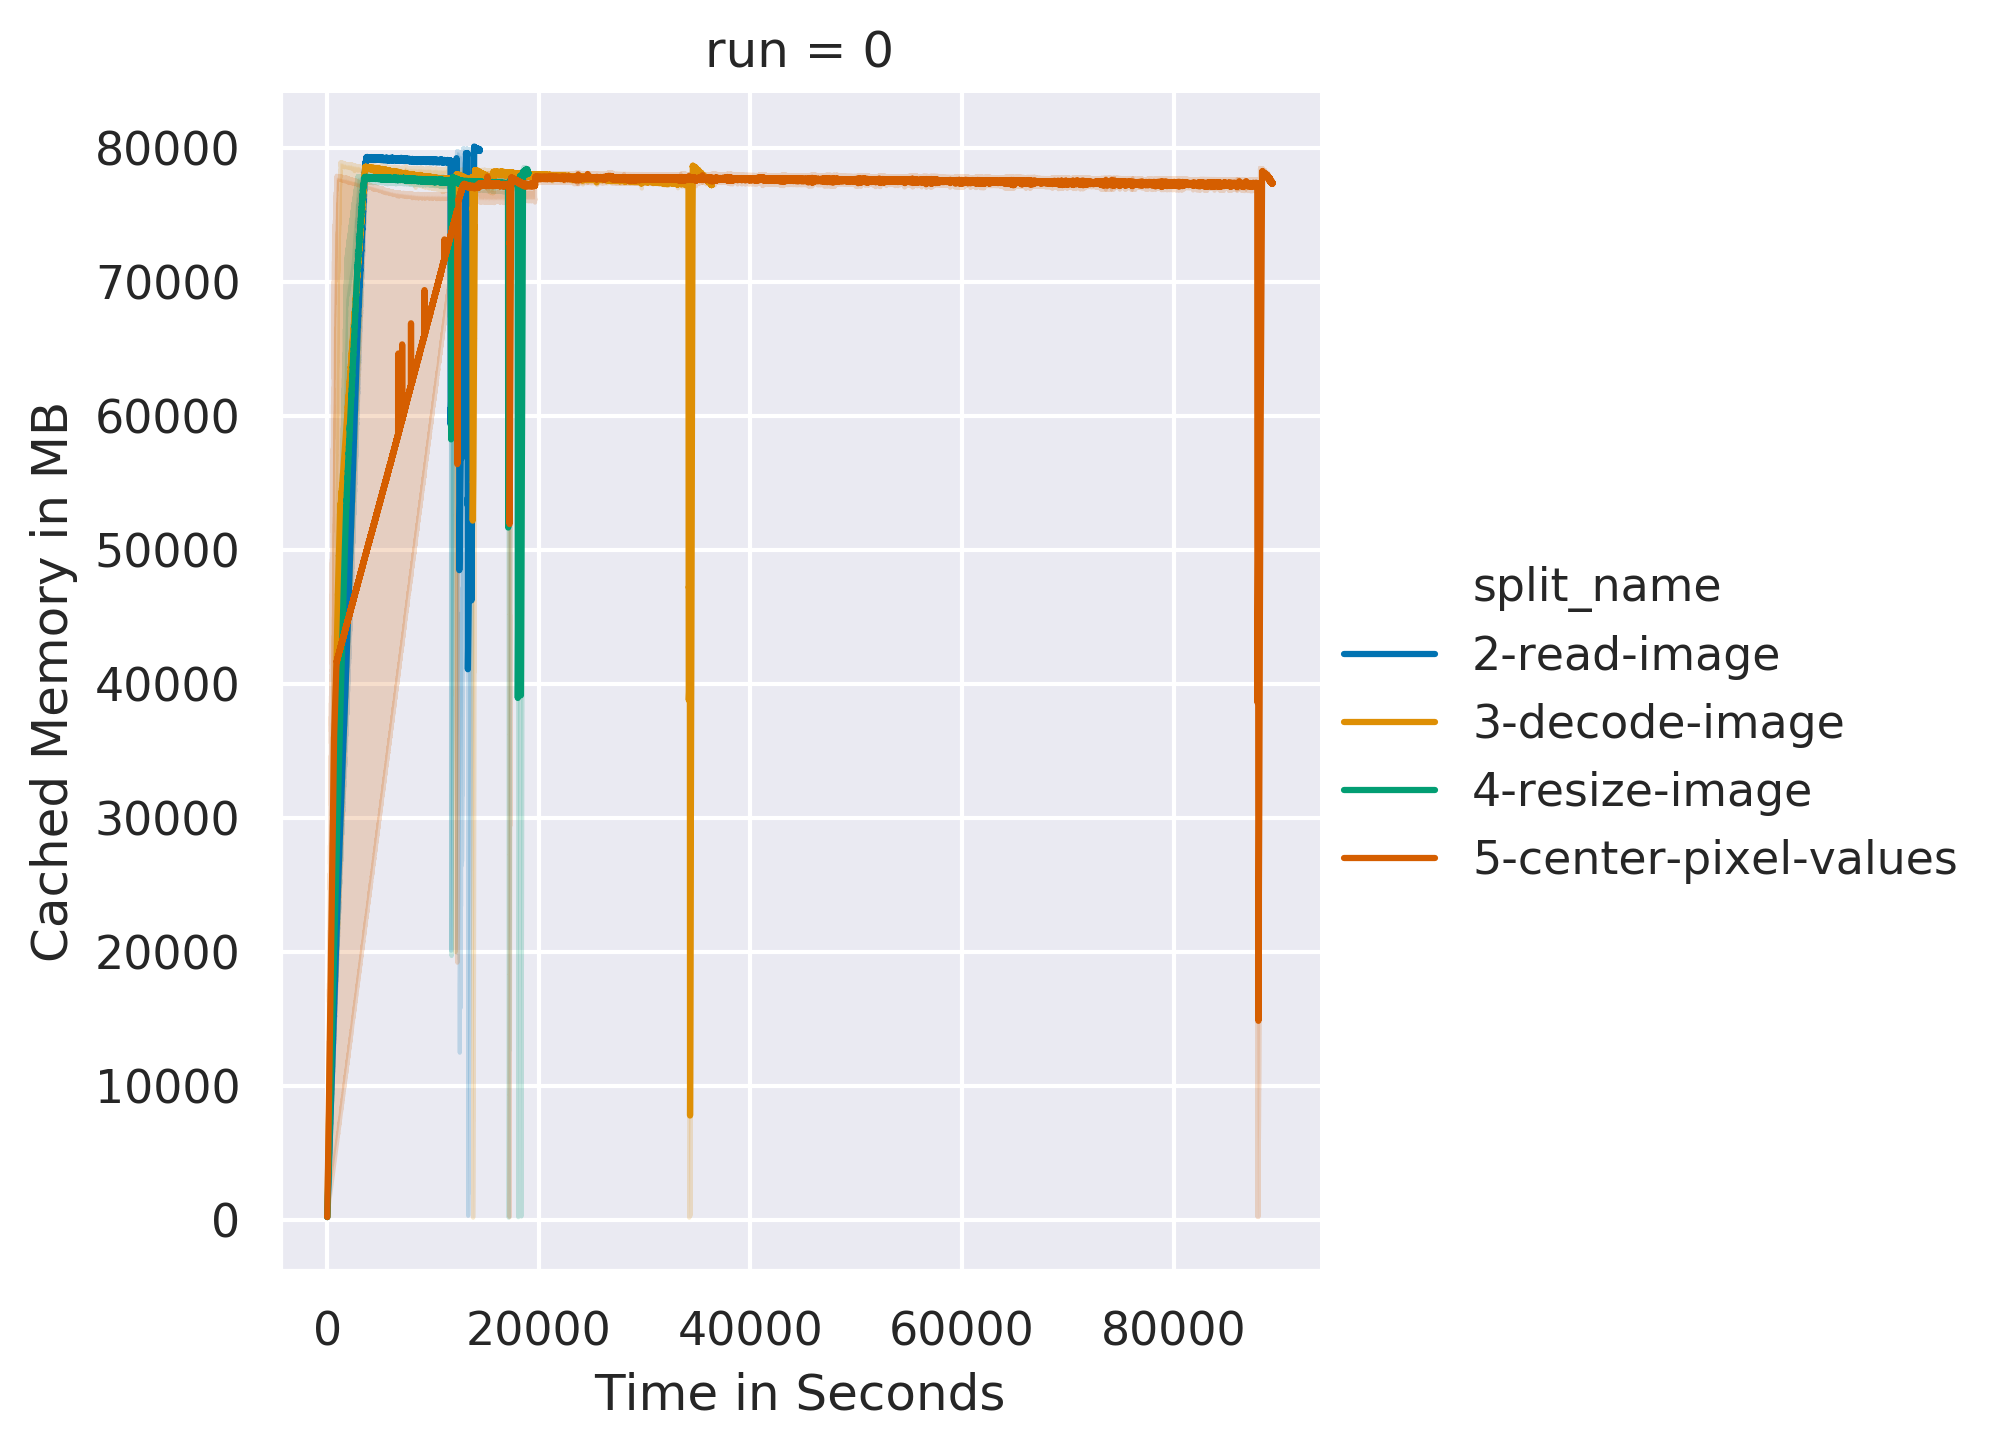

In [106]:
sns.set(palette=default_palette)

cum_dstat_df_temp = cum_dstat_df_copy

plot = sns.relplot(
    x="rel_time_s",
    y="memory_cached_mb",
    hue="split_name",
    col="run",
    kind="line",
    data=cum_dstat_df_temp,
    ci=95
)
plot.set(xlabel="Time in Seconds", ylabel="Cached Memory in MB")
#plot.set(ylim=(0, 1200))
#plot.axhline(1100, color="black")
#plot.legend(strategies_renamed, title="Strategy", loc="upper right", ncol=1,labelspacing=0.10)
#save_fig("network-read-speed-t8-full", file_type="png")